In [ ]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)


Gender
Male      544
Female    471
Name: count, dtype: int64


HR analytics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/HR analytics.xlsx'
df = pd.read_excel(file_path)
print(df.head())


Mounted at /content/drive
               Name  Gender   Department     Salary          Loc     Rating
0      Ches Bonnell    Male        Sales   $88,050      Bellevue  Very Good
1  Garwin Peasegood  Female  Engineering   $68,220      Bellevue       Good
2   Sidoney Yitzhok  Female          NaN  $118,440    Wellington  Not Rated
3  Saunders Blumson    Male        Legal   $56,370   Los Angeles  Very Good
4    Gardy Grigorey  Female      Support  $107,090   Los Angeles       Poor


1.How many Males/Females are there in the entire organization?

2.How many Males/Females are there in each department

In [ ]:
gender_by_department = df.groupby('Department')['Gender'].value_counts()
print(gender_by_department)


Department                Gender
Accounting                Male      42
                          Female    30
Business Development      Female    42
                          Male      42
Engineering               Male      44
                          Female    38
Human Resources           Female    44
                          Male      42
Legal                     Male      56
                          Female    36
Marketing                 Male      36
                          Female    33
Product Management        Male      50
                          Female    42
Research and Development  Female    39
                          Male      39
Sales                     Male      45
                          Female    38
Services                  Female    42
                          Male      42
Support                   Male      47
                          Female    37
Training                  Male      43
                          Female    38
Name: count, dtype: int64


2.How many Males/Females are there in each location?

In [ ]:
gender_by_location = df.groupby('Loc')['Gender'].value_counts()
print(gender_by_location)


Loc          Gender
Bellevue     Male      143
             Female    127
Los Angeles  Male      209
             Female    176
Wellington   Male      192
             Female    168
Name: count, dtype: int64


In [ ]:

df['Salary'] = pd.to_numeric(df['Salary'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
print(df.dtypes)


Name          object
Gender        object
Department    object
Salary         int64
Loc           object
Rating        object
dtype: object


3.For which department is the average Pay highest?

In [ ]:
avg_salary_by_department = df.groupby('Department')['Salary'].mean()
highest_salary_department = avg_salary_by_department.idxmax()
highest_salary = avg_salary_by_department.max()

print(f"The department with the highest average pay is {highest_salary_department} with an average salary of {highest_salary}")


The department with the highest average pay is Business Development with an average salary of 74335.95238095238


4.For which location is the average Pay highest?

In [ ]:
avg_salary_by_location = df.groupby('Loc')['Salary'].mean()
highest_salary_location = avg_salary_by_location.idxmax()
highest_salary_location_value = avg_salary_by_location.max()

print(f"The location with the highest average pay is {highest_salary_location} with an average salary of {highest_salary_location_value}")


The location with the highest average pay is Bellevue with an average salary of 72201.96296296296


In [ ]:

avg_salary_by_dept = df.groupby('Department')['Salary'].mean()
print(avg_salary_by_dept)


Department
Accounting                  71055.833333
Business Development        74335.952381
Engineering                 70380.365854
Human Resources             67637.558140
Legal                       68369.565217
Marketing                   72324.202899
Product Management          70814.347826
Research and Development    64935.384615
Sales                       69550.963855
Services                    73931.547619
Support                     72349.523810
Training                    72281.728395
Name: Salary, dtype: float64


5.What percentage of employees received good & very good ratings? What about poor & very poor ratings? Also, the average rating?

In [ ]:
rating_counts = df['Rating'].value_counts(normalize=True) * 100
print(rating_counts)
average_rating = df['Rating'].map({"Poor": 1, "Good": 2, "Very Good": 3, "Very Poor": 0}).mean()
print(f"Average rating is {average_rating}")


Rating
Average      45.418719
Good         18.817734
Poor         13.201970
Very Good     9.162562
Not Rated     7.783251
Very Poor     5.615764
Name: proportion, dtype: float64
Average rating is 1.6736842105263159


 6.Compute gender pay gap for each department. Interpret

In [ ]:
gender_pay_gap_by_dept = df.groupby(['Department', 'Gender'])['Salary'].mean().unstack()
gender_pay_gap_by_dept['Pay Gap'] = (gender_pay_gap_by_dept['Male'] - gender_pay_gap_by_dept['Female']) / gender_pay_gap_by_dept['Male'] * 100
print(gender_pay_gap_by_dept)


Gender                          Female          Male    Pay Gap
Department                                                     
Accounting                68076.333333  73184.047619   6.979273
Business Development      72850.952381  75820.952381   3.917123
Engineering               75422.105263  66026.136364 -14.230681
Human Resources           62039.318182  73502.380952  15.595499
Legal                     64700.833333  70728.035714   8.521660
Marketing                 74313.333333  70500.833333  -5.407737
Product Management        69088.095238  72264.400000   4.395394
Research and Development  64896.153846  64974.615385   0.120757
Sales                     66701.052632  71957.555556   7.305005
Services                  73075.476190  74787.619048   2.289340
Support                   68136.486486  75666.170213   9.951189
Training                  73025.263158  71624.651163  -1.955489


7.Compute gender pay gap for each location. Interpret

In [ ]:
gender_pay_gap_by_location = df.groupby(['Loc', 'Gender'])['Salary'].mean().unstack()
gender_pay_gap_by_location['Pay Gap'] = (gender_pay_gap_by_location['Male'] - gender_pay_gap_by_location['Female']) / gender_pay_gap_by_location['Male'] * 100
print(gender_pay_gap_by_location)


Gender             Female         Male   Pay Gap
Loc                                             
Bellevue     69580.236220  74530.34965  6.641742
Los Angeles  70056.079545  71887.84689  2.548090
Wellington   68034.285714  70199.06250  3.083769


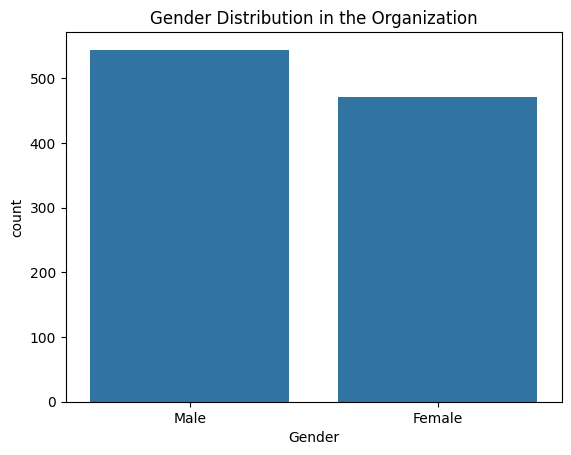

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution in the Organization")
plt.show()


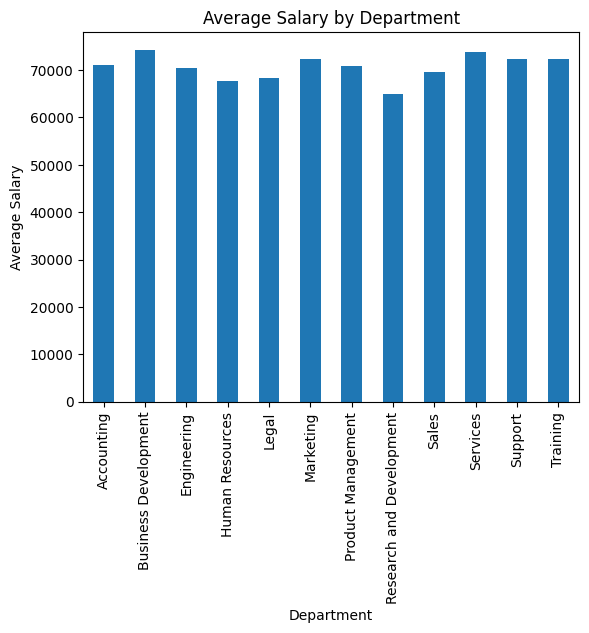

In [ ]:
avg_salary_by_department.plot(kind='bar', title='Average Salary by Department')
plt.ylabel('Average Salary')
plt.show()


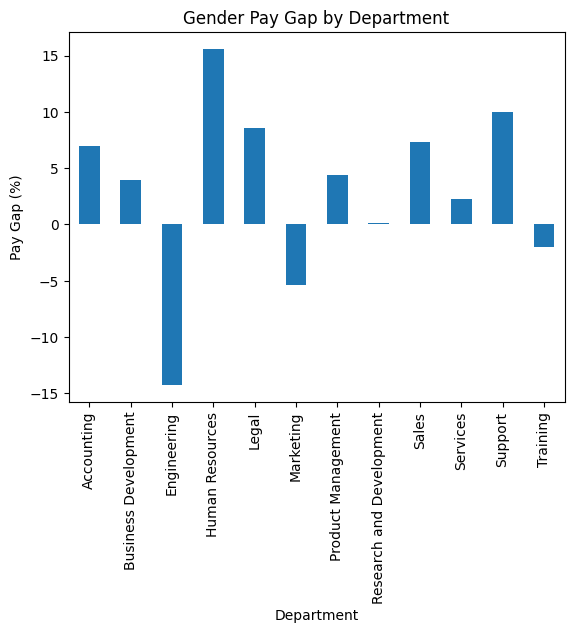

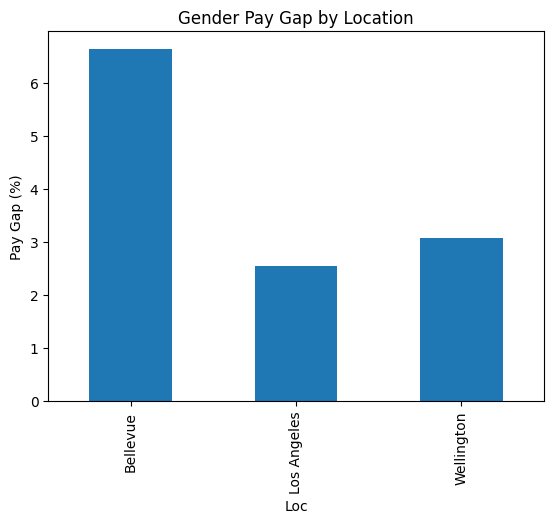

In [ ]:
gender_pay_gap_by_dept['Pay Gap'].plot(kind='bar', title="Gender Pay Gap by Department")
plt.ylabel("Pay Gap (%)")
plt.show()

gender_pay_gap_by_location['Pay Gap'].plot(kind='bar', title="Gender Pay Gap by Location")
plt.ylabel("Pay Gap (%)")
plt.show()


In [ ]:
from scipy.stats import chi2_contingency
gender_dept_table = pd.crosstab(df['Gender'], df['Department'])
chi2, p, dof, expected = chi2_contingency(gender_dept_table)

print(f"Chi-squared statistic: {chi2}, p-value: {p}")
if p < 0.05:
    print("There is a significant association between gender and department.")
else:
    print("There is no significant association between gender and department.")


Chi-squared statistic: 4.949409429919861, p-value: 0.9335918602253642
There is no significant association between gender and department.


In [ ]:

df['Rating_numerical'] = df['Rating'].map({"Poor": 1, "Good": 2, "Very Good": 3, "Very Poor": 0})
correlation_matrix = df[['Salary', 'Rating_numerical']].corr()
print(correlation_matrix)


                    Salary  Rating_numerical
Salary            1.000000          0.009312
Rating_numerical  0.009312          1.000000
